In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
#                               AutoMinorLocator, LogLocator, ScalarFormatter)

In [7]:
# folder='/home/ale/heavyatoms/hullac/Hf/'
folder='/home/ale/nemesis/heavyatoms/hullac/Hf/'
experiment=pd.read_csv(folder+"experimento.dat",header='infer',sep='\s+')
diracfock=pd.read_csv(folder+"diracfock.dat",header=None,sep='\s+')
hullac=pd.read_csv(folder+"bindener.res",header=None,sep='\s+')
# autofolder="/home/ale/AS/Hf"
autofolder="/home/ale/nemesis/AS/Hf"
autoNR=pd.read_csv(autofolder+"/norelat/bindener.dat",header=None,sep='\s+')
autoSR=pd.read_csv(autofolder+"/semirelat/bindener.dat",header=None,sep='\s+')

In [8]:
experiment['erpNR']=(experiment.loc[:18]['energy']-abs(autoNR).loc[:18][6])/experiment.loc[:18]['energy']*100
experiment['erpDF']=(experiment.loc[:18]['energy']-diracfock.loc[:18][1])/experiment.loc[:18]['energy']*100
experiment['erpR']=(experiment.loc[:18]['energy']-hullac.loc[:18][1])/experiment.loc[:18]['energy']*100

In [25]:
experiment.head()

,#,energy,erpNR,erpDF,erpR
0,1s,4803.170,8.900686,-0.618675,0.047522
1,2s,828.397,14.181840,-0.946382,1.259141
2,2p-,789.296,13.980932,-0.956599,1.111536
3,2p+,702.715,3.382586,-0.902585,1.420810
4,3s,191.168,15.657291,-1.941204,2.130092


In [9]:
x=hullac.index.tolist()
my_xticks=[r'$1s$',
           r'$2s$',r'$2p_{-}$',r'$2p_{+}$',
           r'$3s$',r'$3p_{-}$',r'$3p_{+}$',r'$3d_{-}$',r'$3d_{+}$',
           r'$4s$',r'$4p_{-}$',r'$4p_{+}$',r'$4d_{-}$',r'$4d_{+}$',
           r'$5s$',r'$5p_{-}$',r'$5p_{+}$',r'$4f_{-}$',r'$4f_{+}$',r'$5d_{-}$',r'$5d_{+}$',
           r'$6s$']

In [14]:
plt.rcParams['font.size']=21
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Times']
plt.rc('text', usetex=True)

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "STIX"
plt.rcParams["mathtext.fontset"] = "stix"

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


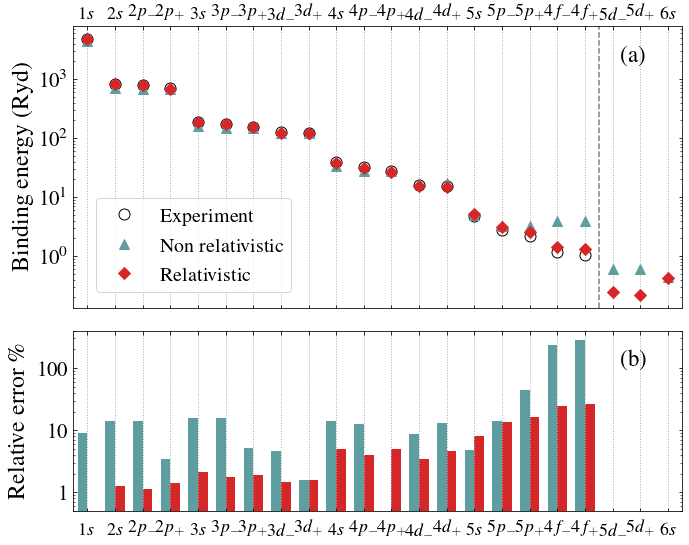

In [17]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(nrows=5, ncols=1)

ax1 = fig.add_subplot(gs[:3,0])
plt.text(0.9,0.87,r'(a)',fontsize=23,transform=ax1.transAxes)
plt.ylabel(r'Binding energy (Ryd)',fontsize=24,labelpad=8)
plt.plot(experiment['energy'],'ko',markersize=11,label='Experiment',markerfacecolor='none',markeredgewidth=1)
plt.plot(-autoNR[6],'^',color='cadetblue',markersize=10,label='Non relativistic')
plt.plot(hullac[1],'D',color='tab:red',markersize=8,label='Relativistic')
plt.axvline(18.5,color='tab:gray',linestyle='dashed')
plt.xlim(-0.5,21.5)
plt.yscale('log')
plt.xticks(x, my_xticks,fontsize=18)
plt.legend(bbox_to_anchor=(0.02, 0.02, 1., 0), loc='lower left',fontsize=20)
plt.grid(which='major', linestyle='dotted', linewidth=1,axis='x')
plt.tick_params(direction='in',axis='x',which='both',bottom=True,top=True,labeltop=True,labelbottom=False)
plt.tick_params(direction='in',axis='y',which='both',right=True,left=True)

ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)
plt.text(0.9,0.8,'(b)',fontsize=23,transform=ax2.transAxes)
plt.ylabel(r'Relative error \%',fontsize=24,labelpad=10)
ax2.bar(experiment.index,abs(experiment['erpNR']),color='cadetblue',width=-0.35, align='edge')
ax2.bar(experiment.index,abs(experiment['erpR']),color='tab:red',width=0.35, align='edge')
plt.yscale('log')
plt.ylim(0.5,400)
ax2.set_xticklabels(my_xticks,y=-0.04,fontsize=18)
plt.grid(which='major', linestyle='dotted', linewidth=1,axis='x')
plt.tick_params(direction='in',axis='x',which='both',bottom=True,top=True,labelbottom=True)
plt.tick_params(direction='in',axis='y',which='both',right=True,left=True)

ax2.set_yticks([1, 10,100])
ax2.get_yaxis().set_major_formatter(mticker.ScalarFormatter())
locmin = mticker.LogLocator(base=10.0, subs=np.arange(2, 10)*.1,numticks=100)
ax2.yaxis.set_minor_locator(locmin)

plt.tight_layout()
plt.savefig('../Hf_bindener_bar.eps')
plt.show()

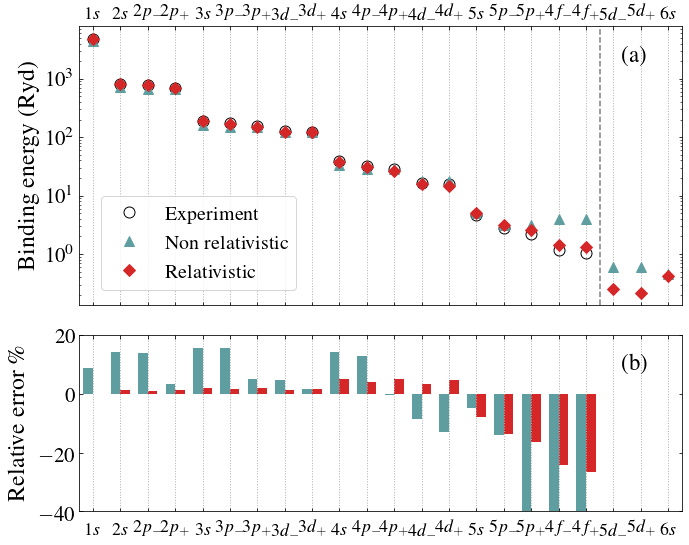

In [24]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(nrows=5, ncols=1)

ax1 = fig.add_subplot(gs[:3,0])
plt.text(0.9,0.87,r'(a)',fontsize=23,transform=ax1.transAxes)
plt.ylabel(r'Binding energy (Ryd)',fontsize=24,labelpad=8)
plt.plot(experiment['energy'],'ko',markersize=11,label='Experiment',markerfacecolor='none',markeredgewidth=1)
plt.plot(-autoNR[6],'^',color='cadetblue',markersize=10,label='Non relativistic')
plt.plot(hullac[1],'D',color='tab:red',markersize=8,label='Relativistic')
plt.axvline(18.5,color='tab:gray',linestyle='dashed')
plt.xlim(-0.5,21.5)
plt.yscale('log')
plt.xticks(x, my_xticks,fontsize=18)
plt.legend(bbox_to_anchor=(0.02, 0.02, 1., 0), loc='lower left',fontsize=20)
plt.grid(which='major', linestyle='dotted', linewidth=1,axis='x')
plt.tick_params(direction='in',axis='x',which='both',bottom=True,top=True,labeltop=True,labelbottom=False)
plt.tick_params(direction='in',axis='y',which='both',right=True,left=True)

ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)
plt.text(0.9,0.8,'(b)',fontsize=23,transform=ax2.transAxes)
plt.ylabel(r'Relative error \%',fontsize=24,labelpad=10)
ax2.bar(experiment.index,experiment['erpNR'],color='cadetblue',width=-0.35, align='edge')
ax2.bar(experiment.index,experiment['erpR'],color='tab:red',width=0.35, align='edge')
# plt.yscale('log')
plt.ylim(-40,20)
ax2.set_xticklabels(my_xticks,y=-0.04,fontsize=18)
plt.grid(which='major', linestyle='dotted', linewidth=1,axis='x')
plt.tick_params(direction='in',axis='x',which='both',bottom=True,top=True,labelbottom=True)
plt.tick_params(direction='in',axis='y',which='both',right=True,left=True)

plt.tight_layout()
plt.show()

In [32]:
experiment

,#,energy,erpNR,erpDF,erpR
0,1s,4803.17000,8.900686,-0.618675,0.047522
1,2s,828.39700,14.181840,-0.946382,1.259141
2,2p-,789.29600,13.980932,-0.956599,1.111536
3,2p+,702.71500,3.382586,-0.902585,1.420810
4,3s,191.16800,15.657291,-1.941204,2.130092
5,3p-,173.82300,15.521623,-2.102771,1.734249
6,3p+,154.86000,5.177031,-2.257923,1.890331
7,3d-,126.12300,4.679051,-2.530213,1.454721
8,3d+,122.15400,1.581905,-2.482342,1.574674
9,4s,39.54200,14.121466,-4.959486,5.009631


In [30]:
sum(abs(experiment[0:14]['erpNR']))/len(experiment[0:14])

9.421399092205945

In [31]:
sum(abs(experiment[0:14]['erpR']))/len(experiment[0:14])

2.477298774247217